## 1. Defining the Question

### a) Specifying the Question


> Determine whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success



*   Come up with decision trees
*   Optimize the decision trees 
*   Make use of support vector machines







### c) Understanding the context 

Nairobi Hospital came up with a clinical camp to test for hypothyroidism. For his camp, they want it to be automated so as to increace effiency in their services and at the time save on time and fatigue

### d) Recording the Experimental Design



 

*   Data Cleaning
*   Feature Engineering
*   Decision trees
*   Support Vector Machine






### e) Data Relevance

The source of the data is from Nairobi Hospital. With the recent implementation of data protection law, we believe that the data is authentic and unadulterated for the hospital wants to provide the best heathcare services to not only their patient but anybody who wishes to get services from them.

## 2. Reading the Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# loading the dataset and
# converting all the '?' values to NaN
nairobi = pd.read_csv('hypothyroid.csv',na_values = '?')

## 3. Checking the Data

In [0]:
# checking for number of records in the dataset
nairobi.shape

(3163, 26)

there are 3163 rows and 26 features

In [0]:
# previewing the top of the dataset
nairobi.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [0]:
nairobi.take(np.random.permutation(len(nairobi))[:15])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2845,negative,25.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.00,y,2.1,y,87.0,y,0.85,y,102.0,n,NaN
325,negative,67.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.00,n,NaN,y,120.0,y,0.90,y,134.0,n,NaN
1568,negative,84.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.00,y,0.4,y,114.0,y,0.80,y,142.0,n,NaN
2439,negative,54.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.10,y,2.4,y,131.0,y,0.96,y,134.0,n,NaN
928,negative,NaN,M,f,f,t,f,f,f,f,f,f,f,f,y,4.10,y,2.2,y,81.0,y,1.00,y,81.0,n,NaN
1252,negative,38.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.00,n,NaN,y,90.0,y,0.95,y,95.0,n,NaN
665,negative,69.0,F,f,f,f,f,f,t,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,23.0
1163,negative,92.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.00,y,1.4,y,72.0,y,0.75,y,95.0,n,NaN
454,negative,65.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.00,y,1.4,y,88.0,y,0.89,y,99.0,n,NaN
54,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,65.00,y,0.7,y,22.0,y,1.03,y,21.0,n,NaN


In [0]:
nairobi.TT4_measured.unique()

array(['y', 'n'], dtype=object)

In [0]:
# previewing the bottom of the dataset
nairobi.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [0]:
# checking the summary of the dataset
nairobi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00
TBG,260.0,31.283077,19.224659,0.0,21.00,28.00,34.000,122.00


In [0]:
# checking for the datatypes of the dataset
nairobi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null float64
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null float64
T3_measured                  3163 non-null object
T3                           2468 non-nul

The data we have is categorical, that is, 26 categorical data and there are no null values.

In [0]:
# checking for the data types of the dataset
nairobi.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

the above data types coresspond with the data actual values of the dataframe

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

The features depicts the responses of patients, but lack the units for TSH, T3 and TT4 measure. Determining the normal amounts of tsh level is very hectic

## 5. Tidying the Dataset

In [0]:

nairobi.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [0]:
# standardising the column names 
nairobi.columns = nairobi.columns.str.lower()

In [0]:
#checking if the columns have been standardised
nairobi.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [0]:
# Identifying the Missing Data
#
nairobi.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

this is to confirm that there are no null values as we had seen earlier.

In [0]:
# dealing with missing values
nairobi.fillna(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,0.0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,0.0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,0.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,0.0


In [0]:
nairobi["age"].fillna(nairobi['age'].mean(), inplace = True) 
nairobi["sex"].fillna(nairobi['sex'].mode(), inplace = True) 
nairobi.fillna(0, inplace=True)

filling missing values in age  by the mean value since we cannot fill with 0. the dataset is based on adults, thus having an age of 0 will be inappropriate.
*********
for sex we are going to fill with the most common sex.
**********
for the rest of the dataset we are going to fill with 0 since it was orriginally null. there is no need to put values more than 0 since its inaccurate in the first place.

In [0]:
# checking whether we have delt with the null values
nairobi.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

we have now dealt with the outliers in the dataset. we can now proceed and do our analysis

# Univariate Analysis

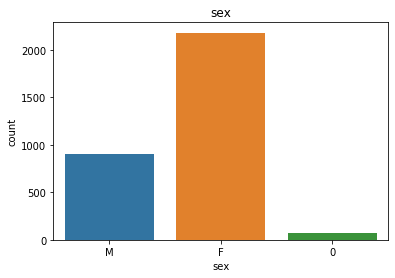

In [0]:
sns.countplot(data = nairobi, x='sex')
plt.title('sex')
plt.show()

most of the patients who took the test are females. there are a few unknowns who also too the test.

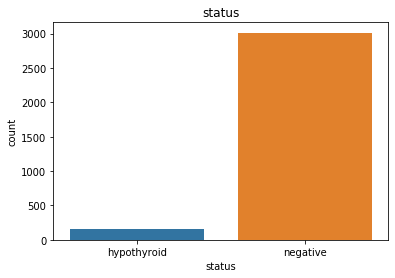

In [0]:
sns.countplot(x='status', data=nairobi)
plt.title('status')
plt.show()

most of the patients tested negative.

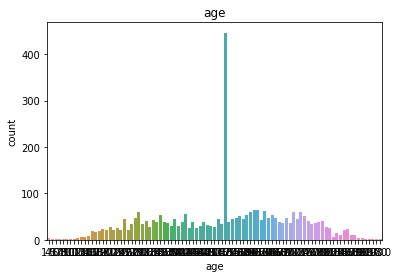

In [0]:
sns.countplot(x='age', data=nairobi)
plt.title('age')
plt.show()

we will have to change the age format from categorical to numerical. this will be done during feature engineering.

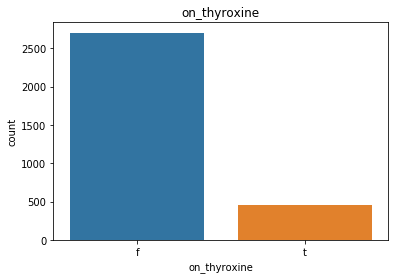

In [0]:
sns.countplot(x='on_thyroxine', data=nairobi)
plt.title('on_thyroxine')
plt.show()

there are many patients who produced less thyroxine

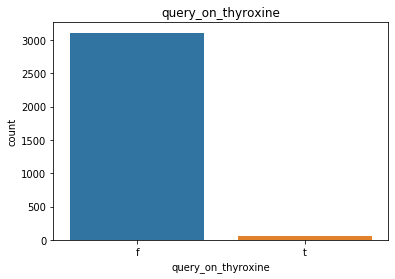

In [0]:
sns.countplot(x='query_on_thyroxine', data=nairobi)
plt.title('query_on_thyroxine')
plt.show()

there are many patients who did not query about thyroxine

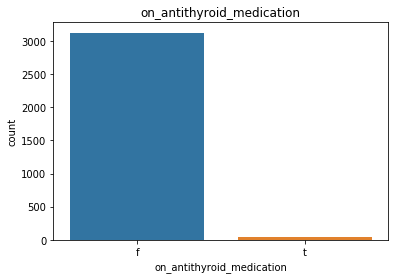

In [0]:
sns.countplot(x='on_antithyroid_medication', data=nairobi)
plt.title('on_antithyroid_medication')
plt.show()

many patients did not use antithyroid medications

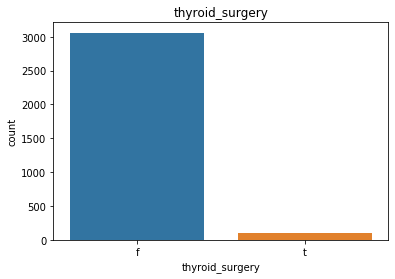

In [0]:
sns.countplot(x='thyroid_surgery', data=nairobi)
plt.title('thyroid_surgery')
plt.show()

many patients had not gone for thyroid surgery

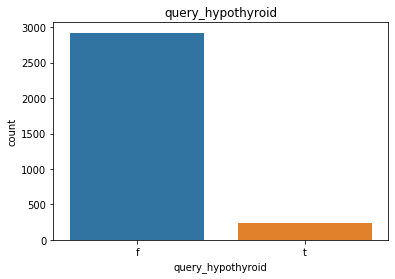

In [0]:
sns.countplot(x='query_hypothyroid', data=nairobi)
plt.title('query_hypothyroid')
plt.show()

many patients had not queried on hypothyroid 

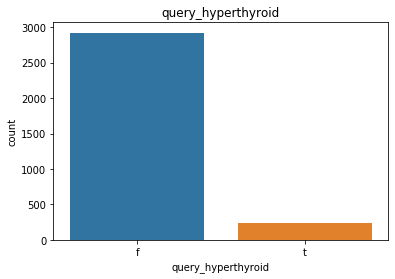

In [0]:
sns.countplot(x='query_hyperthyroid', data=nairobi)
plt.title('query_hyperthyroid')
plt.show()

many patients had not queried on hyperthyroid

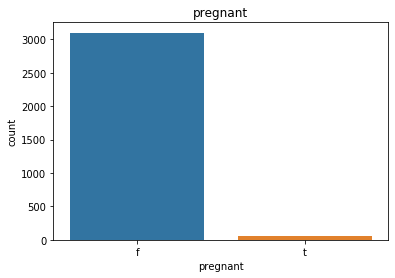

In [0]:
sns.countplot(x='pregnant', data=nairobi)
plt.title('pregnant')
plt.show()

most of the patients were not pregnant

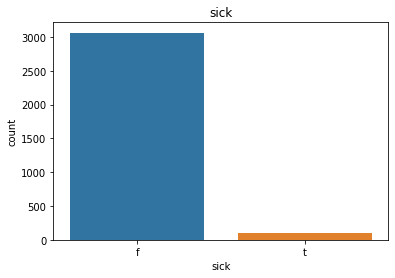

In [0]:
sns.countplot(x='sick', data=nairobi)
plt.title('sick')
plt.show()

most of the patients were not suffering from any illness

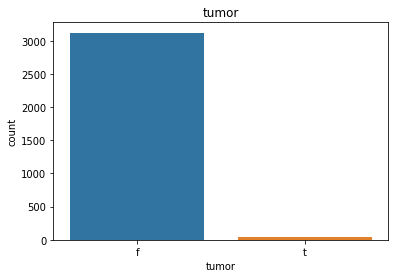

In [0]:
sns.countplot(x='tumor', data=nairobi)
plt.title('tumor')
plt.show()

most of the patients were not suffering from a tumor

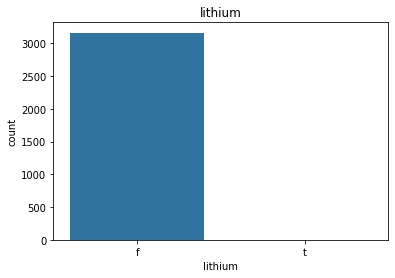

In [0]:
sns.countplot(x='lithium', data=nairobi)
plt.title('lithium')
plt.show()

most of the patients did not take lithium.

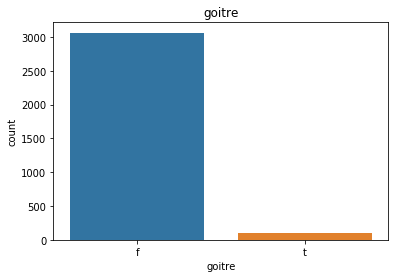

In [0]:
sns.countplot(x='goitre', data=nairobi)
plt.title('goitre')
plt.show()

most of the patients did not suffer from goitre

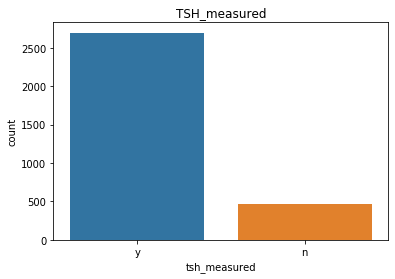

In [0]:
sns.countplot(x='tsh_measured', data=nairobi)
plt.title('TSH_measured')
plt.show()

most of the patients took TSH test

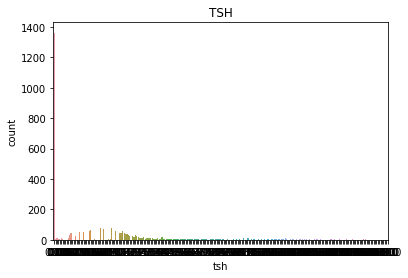

In [0]:
sns.countplot(x='tsh', data=nairobi)
plt.title('TSH')
plt.show()

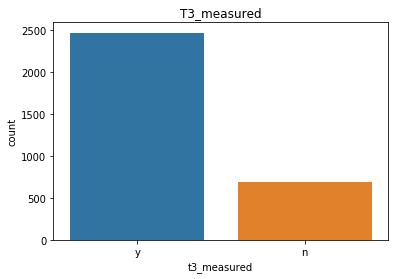

In [0]:
sns.countplot(x='t3_measured', data=nairobi)
plt.title('T3_measured')
plt.show()

most of the patients took the T3 test

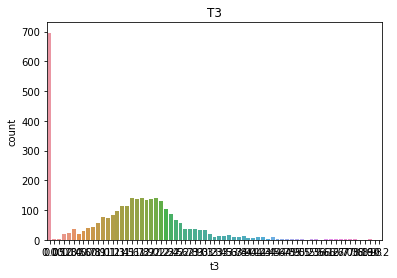

In [0]:
sns.countplot(x='t3', data=nairobi)
plt.title('T3')
plt.show()

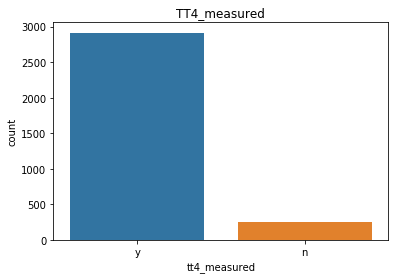

In [0]:
sns.countplot(x='tt4_measured', data=nairobi)
plt.title('TT4_measured')
plt.show()

most of the patients took the TT4 test

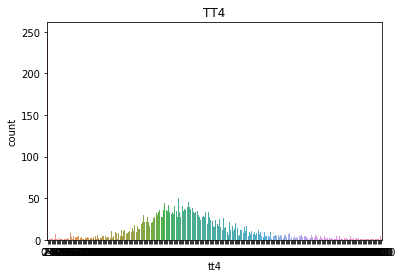

In [0]:
sns.countplot(x='tt4', data=nairobi)
plt.title('TT4')
plt.show()

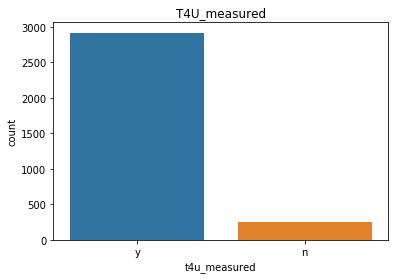

In [0]:
sns.countplot(x='t4u_measured', data=nairobi)
plt.title('T4U_measured')
plt.show()

most of the patients took the T4U test

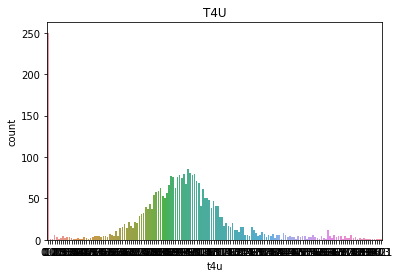

In [0]:
sns.countplot(x='t4u', data=nairobi)
plt.title('T4U')
plt.show()

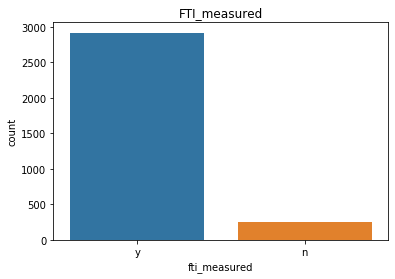

In [0]:
sns.countplot(x='fti_measured', data=nairobi)
plt.title('FTI_measured')
plt.show()

most of the patients took the FTI test

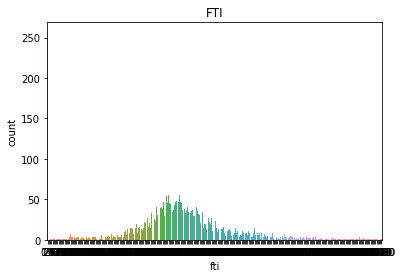

In [0]:
sns.countplot(x='fti', data=nairobi)
plt.title('FTI')
plt.show()

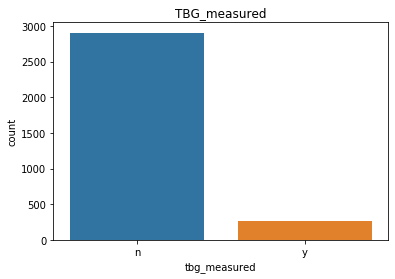

In [0]:
sns.countplot(x='tbg_measured', data=nairobi)
plt.title('TBG_measured')
plt.show()

most of the patients took the TBG test

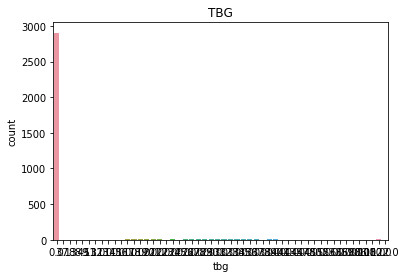

In [0]:
sns.countplot(x='tbg', data=nairobi)
plt.title('TBG')
plt.show()

In [0]:
nairobi.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

we will perform feature engineering on the following columns 


*   age
*   TSH
*   T3
*   TT4
*   T4U
*   FTI
*   TBG

we are going to change the format of these columns from categorical to numerical.
***********
this is will help us visualize the data and see its distribution.










In [0]:
nairobi['age'] = pd.to_numeric(nairobi['age']) 
nairobi['tsh'] = pd.to_numeric(nairobi['tsh']) 
nairobi['t3'] = pd.to_numeric(nairobi['t3']) 
nairobi['tt4'] = pd.to_numeric(nairobi['tt4']) 
nairobi['t4u'] = pd.to_numeric(nairobi['t4u']) 
nairobi['tbg'] = pd.to_numeric(nairobi['tbg']) 

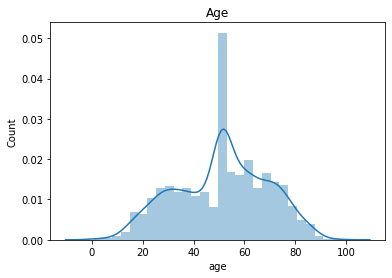

In [0]:
sns.distplot(nairobi.age, hist=True)
plt.title('Age')
plt.ylabel('Count')
plt.show()

In [0]:
nairobi.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0


most of the patient were between the age of 40 to 60

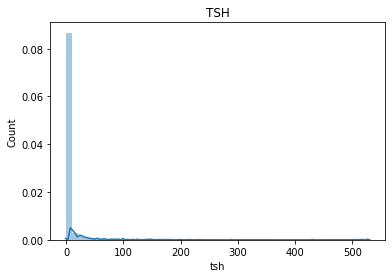

In [0]:
sns.distplot(nairobi.tsh, hist=True)
plt.title('TSH')
plt.ylabel('Count')
plt.show()

there are very many patients who were not tested their TSH levels

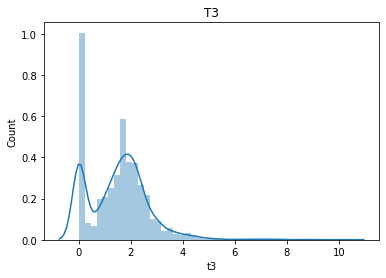

In [0]:
sns.distplot(nairobi.t3, hist=True)
plt.title('T3')
plt.ylabel('Count')
plt.show()

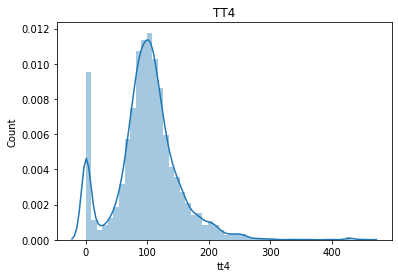

In [0]:
sns.distplot(nairobi.tt4, hist=True)
plt.title('TT4')
plt.ylabel('Count')
plt.show()

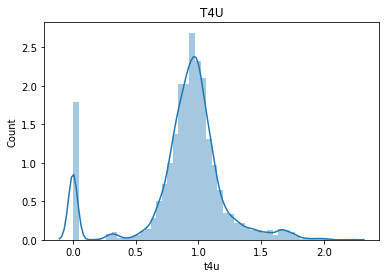

In [0]:
sns.distplot(nairobi.t4u, hist=True)
plt.title('T4U')
plt.ylabel('Count')
plt.show()

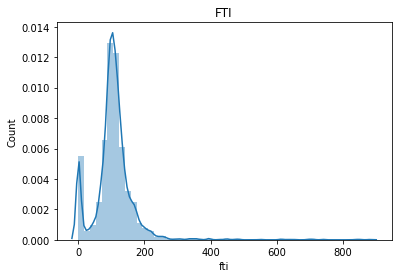

In [0]:
sns.distplot(nairobi.fti, hist=True)
plt.title('FTI')
plt.ylabel('Count')
plt.show()

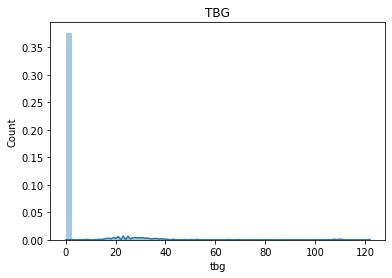

In [0]:
sns.distplot(nairobi.tbg, hist=True)
plt.title('TBG')
plt.ylabel('Count')
plt.show()

In [0]:
nairobi.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

applying label encoding to changing the categorical data to numerical data

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

nairobi.status = le.fit_transform(nairobi.status)
nairobi.sex = le.fit_transform(nairobi.status)
nairobi.on_thyroxine = le.fit_transform(nairobi.on_thyroxine)
nairobi.query_on_thyroxine = le.fit_transform(nairobi.query_on_thyroxine)
nairobi.on_antithyroid_medication = le.fit_transform(nairobi.on_antithyroid_medication)
nairobi.thyroid_surgery = le.fit_transform(nairobi.thyroid_surgery)
nairobi.query_hypothyroid = le.fit_transform(nairobi.query_hypothyroid)
nairobi.query_hyperthyroid = le.fit_transform(nairobi.query_hyperthyroid)
nairobi.pregnant = le.fit_transform(nairobi.pregnant)
nairobi.sick = le.fit_transform(nairobi.sick)
nairobi.tumor = le.fit_transform(nairobi.tumor)
nairobi.lithium = le.fit_transform(nairobi.lithium)
nairobi.goitre = le.fit_transform(nairobi.goitre)
nairobi.tsh_measured = le.fit_transform(nairobi.tsh_measured)
nairobi.t3_measured = le.fit_transform(nairobi.t3_measured)
nairobi.tt4_measured = le.fit_transform(nairobi.tt4_measured)
nairobi.t4u_measured = le.fit_transform(nairobi.t4u_measured)
nairobi.fti_measured = le.fit_transform(nairobi.fti_measured)
nairobi.tbg_measured = le.fit_transform(nairobi.tbg_measured)

# Bivariate Analysis

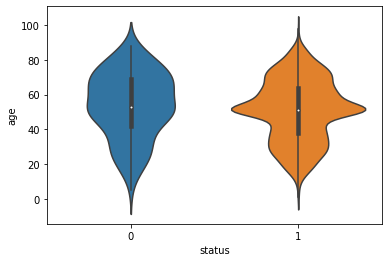

In [0]:
sns.violinplot(x ='status', y='age', data=nairobi)

the negative status, is more 

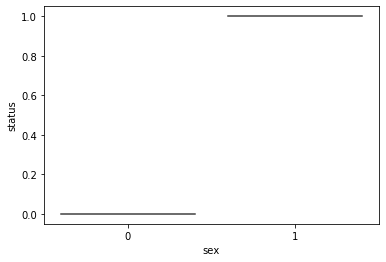

In [0]:
sns.violinplot(x='sex', y='status', data=nairobi)

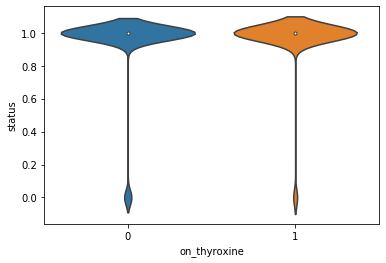

In [0]:
sns.violinplot(x='on_thyroxine', y='status', data=nairobi)

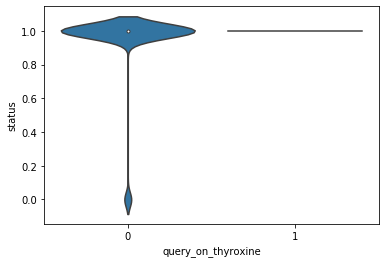

In [0]:
sns.violinplot(x='query_on_thyroxine', y='status', data=nairobi)

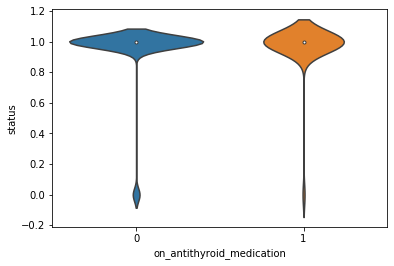

In [0]:
sns.violinplot(x='on_antithyroid_medication', y='status', data=nairobi)

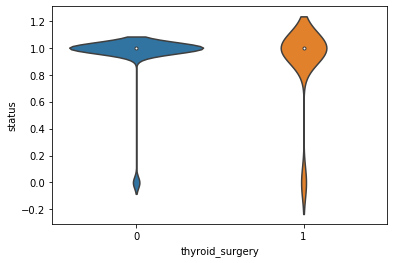

In [0]:
sns.violinplot(x='thyroid_surgery', y='status', data=nairobi)

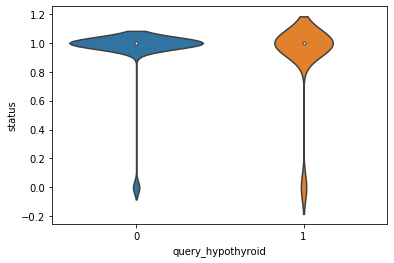

In [0]:
sns.violinplot(x='query_hypothyroid', y='status', data=nairobi)

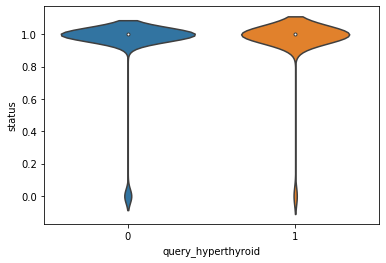

In [0]:
sns.violinplot(x='query_hyperthyroid', y='status', data=nairobi)

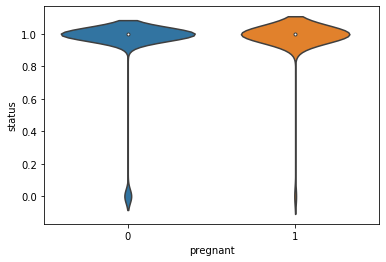

In [0]:
sns.violinplot(x='pregnant', y='status', data=nairobi)

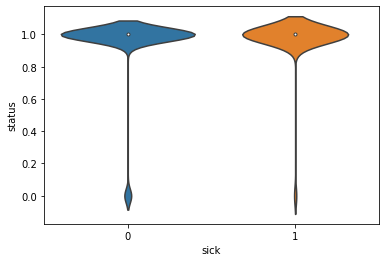

In [0]:
sns.violinplot(x='sick', y='status', data=nairobi)

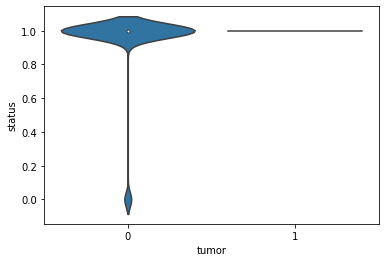

In [0]:
sns.violinplot(x='tumor', y='status', data=nairobi)

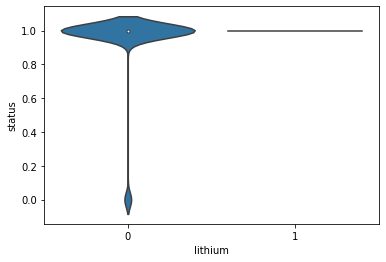

In [0]:
sns.violinplot(x='lithium', y='status', data=nairobi)

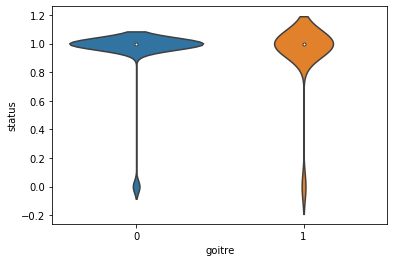

In [0]:
sns.violinplot(x='goitre', y='status', data=nairobi)

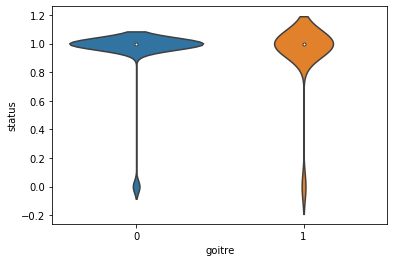

In [0]:
sns.violinplot(x='goitre', y='status', data=nairobi)

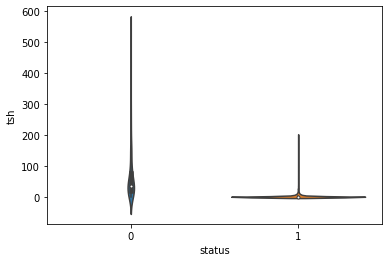

In [0]:
sns.violinplot(x='status', y='tsh', data=nairobi)

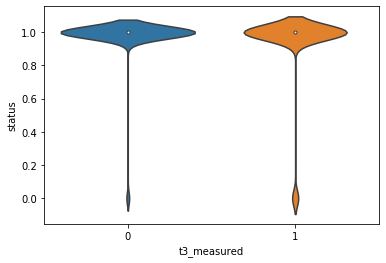

In [0]:
sns.violinplot(x='t3_measured', y='status', data=nairobi)

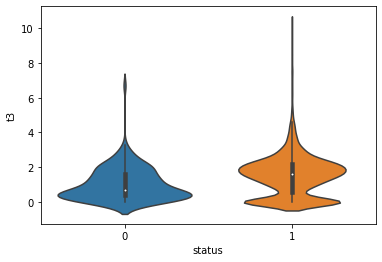

In [0]:
sns.violinplot(x='status', y='t3', data=nairobi)

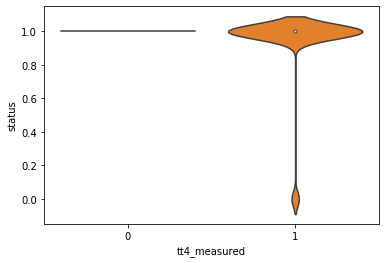

In [0]:
sns.violinplot(x='tt4_measured', y='status', data=nairobi)

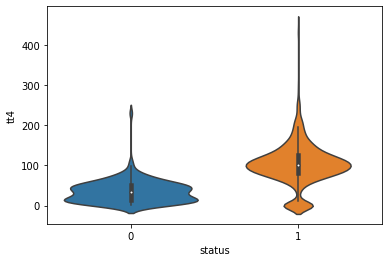

In [0]:
sns.violinplot(x='status', y='tt4', data=nairobi)

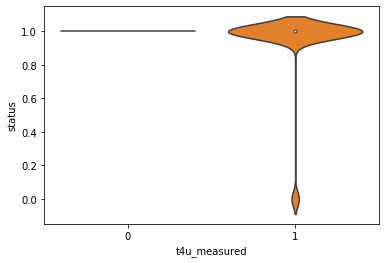

In [0]:
sns.violinplot(x='t4u_measured', y='status', data=nairobi)

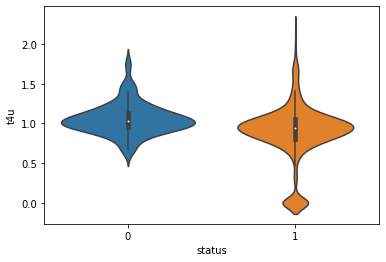

In [0]:
sns.violinplot(x='status', y='t4u', data=nairobi)

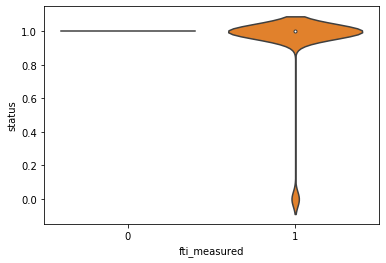

In [0]:
sns.violinplot(x='fti_measured', y='status', data=nairobi)

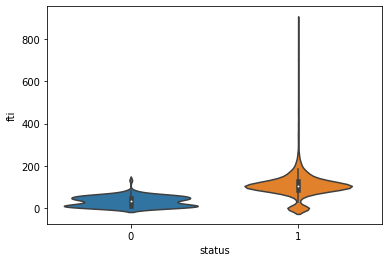

In [0]:
sns.violinplot(x='status', y='fti', data=nairobi)

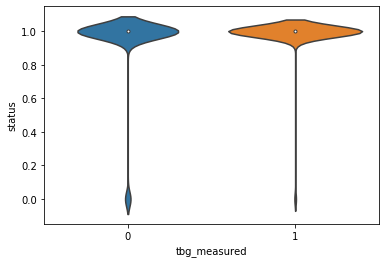

In [0]:
sns.violinplot(x='tbg_measured', y='status', data=nairobi)

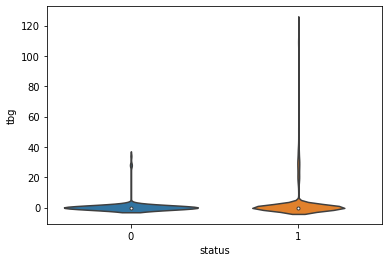

In [0]:
sns.violinplot(x='status', y='tbg', data=nairobi)

#Decision Tree

In [0]:
nairobi.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [0]:
# data preparation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
y = nairobi.status.values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg']
x = nairobi[test_features].values


In [0]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=0)

# train the data
tree = DecisionTreeClassifier()

tree = tree.fit(x_train, y_train)

# prediction
y_pred = tree.predict(x_test)

now that we have trained the data. we can now check for the accuracy of the data

In [0]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


we have gotten the accuracy of the data and its at 100%. these is a positive sign. lets now get to business of getting the descision tree.

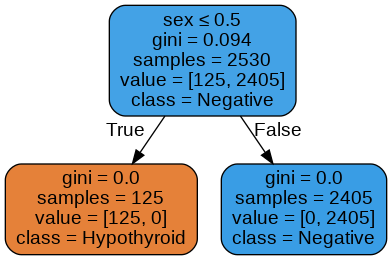

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names = test_features, class_names=['Hypothyroid','Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroid,png')
Image(graph.create_png())

In [0]:
nairobi.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

now, we are going to do an optimise our results using random forest classifiers.

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest = forest.fit(x_train, y_train)

#prediction
y_pred = forest.predict(x_test)

In [0]:
# getting the accuracy score
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

accuracy:  1.0


the accuracy of the random forest is 100%. this is a very good model

#SVM

we are going to use the trained data that we had used earlier in making decision trees

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.9747235387045814


lets now check the kernels that the svm uses as its parameter for the kernel

**Linear Kernel**

In [0]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))

accuracy score:  1.0


In [0]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))

accuracy score:  0.9747235387045814


svm uses the rbf kernel

In [0]:
svc = SVC(kernel='poly')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred))

accuracy score:  0.9636650868878357


the polynomial is performing poorly. this may be due to overfiiting the model.

we are now going to get the results of the confusion matrix since it will be a lot hard in getting the visualisations for we are dealing with a lot of features.

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  6,  20],
       [  3, 604]])

#challenging the model

the model was always